# Friendships within a Distributed Group (2019)

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Importing Data

### How well do you know this person?

In [2]:
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_know

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,4.0,4.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0
Emma,2.0,NaN,3.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0
Cam,4.0,3.0,5.0,NaN,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,5.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0,5.0
Isaac,2.0,2.0,5.0,5.0,5.0,NaN,2.0,1.0,4.0,4.0,1.0,2.0,1.0,5.0
Alex,3.0,4.0,5.0,5.0,2.0,3.0,NaN,5.0,2.0,2.0,2.0,3.0,3.0,3.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN,4.0,3.0,4.0,3.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you like this person?

In [3]:
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_like

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,5.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0
Emma,4.0,NaN,3.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,5.0,3.0,5.0
Gabby,5.0,5.0,NaN,5.0,5.0,4.0,5.0,4.0,3.0,5.0,4.0,3.0,5.0,2.0
Cam,4.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,3.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,5.0,2.0,1.0,3.0,5.0
Alex,4.0,4.0,5.0,5.0,2.0,4.0,NaN,5.0,2.0,3.0,2.0,3.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,5.0,3.0,4.0,4.0,4.0,3.0,5.0,NaN,4.0,4.0,4.0,5.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [4]:
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_contact

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0
Gabby,1.0,1.0,NaN,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Cam,2.0,1.0,4.0,NaN,3.0,4.0,2.0,2.0,4.0,3.0,2.0,2.0,3.0,1.0
Andrew,1.0,1.0,1.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0
Isaac,1.0,1.0,2.0,5.0,5.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,1.0,5.0
Alex,1.0,1.0,3.0,2.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,2.0,1.0,2.0,3.0,3.0,3.0,2.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you trust this person?

In [5]:
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_trust

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,4.0,3.0,1.0,1.0,4.0,5.0,2.0,4.0,2.0,4.0,3.0,1.0
Emma,2.0,NaN,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0
Cam,3.0,2.0,5.0,NaN,3.0,3.0,2.0,5.0,4.0,4.0,2.0,2.0,4.0,2.0
Andrew,3.0,3.0,3.0,4.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,4.0,1.0,1.0,1.0,5.0
Alex,3.0,4.0,5.0,3.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,2.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,3.0,5.0,3.0,3.0,4.0,3.0,4.0,5.0,NaN,4.0,3.0,4.0,4.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How likely are you to go to this person for advice or emotional support?

In [6]:
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)
data_2019_support

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0
Gabby,2.0,2.0,NaN,5.0,1.0,3.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0
Cam,3.0,1.0,5.0,NaN,3.0,4.0,1.0,5.0,3.0,4.0,2.0,1.0,3.0,1.0
Andrew,1.0,1.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Isaac,1.0,1.0,3.0,5.0,5.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0
Alex,3.0,3.0,5.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### General Data / Demographics

In [7]:
data_2019_demographics = pd.read_csv("data/2019_demographics.csv", index_col=0)
data_2019_demographics

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle


In [8]:
people = list(data_2019_demographics.sort_values(by=['lname']).index)
people

['Steph',
 'Emma',
 'Gabby',
 'Cam',
 'Andrew',
 'Isaac',
 'Alex',
 'Arielle',
 'Liam',
 'James',
 'Drew',
 'Ruben',
 'Ziqian',
 'Michelle']

In [9]:
data_2019_demographics_men = data_2019_demographics[data_2019_demographics['gender']=='Male']
data_2019_demographics_men

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Andrew,Jeon,Male,Asian;White,Northfield,MN,St. Olaf College,55057.0,Computer Science; Economics,Milano
Drew,Pelusi,Male,White,Boston,MA,Boston University,2215.0,Computer Science,Sugar Cookie
James,Palmer,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ruben,Walter,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_2019_demographics_women = data_2019_demographics[data_2019_demographics['gender']=='Female']
data_2019_demographics_women

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle
Arielle,Moreira,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
men = list(data_2019_demographics_men.index)
men

['Cam', 'Isaac', 'Liam', 'Andrew', 'Drew', 'James', 'Ruben']

In [12]:
women = list(data_2019_demographics_women.index)
women

['Steph', 'Gabby', 'Ziqian', 'Alex', 'Emma', 'Michelle', 'Arielle']

## Average: The Numbers

### How well do you know this person?

In [13]:
avg_2019_know = data_2019_know.mean()
avg_2019_know.sort_values(ascending=False)

Cam         4.222222
Michelle    4.111111
Gabby       4.111111
Isaac       4.000000
James       3.500000
Ruben       3.300000
Andrew      3.222222
Emma        3.111111
Liam        3.000000
Steph       3.000000
Alex        2.888889
Arielle     2.700000
Ziqian      2.600000
Drew        2.111111
dtype: float64

### How much do you like this person?

In [14]:
avg_2019_like = data_2019_like.mean()
avg_2019_like.sort_values(ascending=False)

Emma        4.222222
James       4.200000
Cam         4.111111
Gabby       4.111111
Arielle     4.100000
Steph       4.000000
Isaac       3.888889
Ziqian      3.800000
Alex        3.777778
Ruben       3.700000
Andrew      3.666667
Liam        3.444444
Michelle    3.333333
Drew        3.333333
dtype: float64

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [15]:
avg_2019_contact = data_2019_contact.mean()
avg_2019_contact.sort_values(ascending=False)

Isaac       2.666667
Cam         2.555556
Michelle    2.222222
Andrew      2.111111
Gabby       2.111111
Liam        1.777778
James       1.600000
Ruben       1.500000
Arielle     1.500000
Alex        1.444444
Steph       1.444444
Ziqian      1.400000
Drew        1.333333
Emma        1.333333
dtype: float64

### How much do you trust this person?

In [16]:
avg_2019_trust = data_2019_trust.mean()
avg_2019_trust.sort_values(ascending=False)

Gabby       3.888889
Emma        3.777778
Arielle     3.600000
Cam         3.444444
James       3.400000
Alex        3.333333
Michelle    3.111111
Isaac       3.111111
Steph       3.000000
Andrew      2.888889
Ziqian      2.800000
Ruben       2.700000
Liam        2.666667
Drew        2.111111
dtype: float64

### How likely are you to go to this person for advice or emotional support?

In [17]:
avg_2019_support = data_2019_support.mean()
avg_2019_support.sort_values(ascending=False)

Cam         2.555556
Isaac       2.333333
Gabby       2.333333
Michelle    2.000000
Arielle     2.000000
Andrew      2.000000
James       1.800000
Emma        1.777778
Steph       1.555556
Alex        1.444444
Liam        1.333333
Ruben       1.300000
Ziqian      1.200000
Drew        1.111111
dtype: float64

## Average: Basic Analysis

### How well do you know this person?

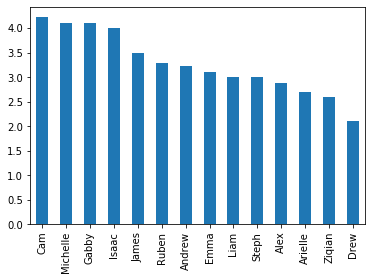

In [18]:
avg_2019_know.sort_values(ascending=False).plot.bar()

In [19]:
avg_2019_know_men = avg_2019_know[avg_2019_know.index.isin(men)==True]
avg_2019_know_men

Cam       4.222222
Andrew    3.222222
Isaac     4.000000
Liam      3.000000
James     3.500000
Drew      2.111111
Ruben     3.300000
dtype: float64

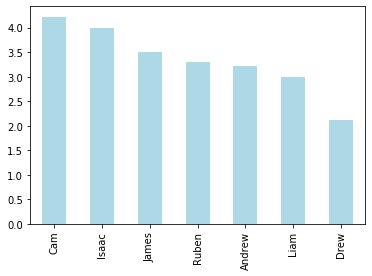

In [20]:
avg_2019_know_men_plot = avg_2019_know_men.sort_values(ascending=False).plot.bar(color="LightBlue")
avg_2019_know_men_plot

In [21]:
avg_2019_know_women = avg_2019_know[avg_2019_know.index.isin(women)==True]
avg_2019_know_women

Steph       3.000000
Emma        3.111111
Gabby       4.111111
Alex        2.888889
Arielle     2.700000
Ziqian      2.600000
Michelle    4.111111
dtype: float64

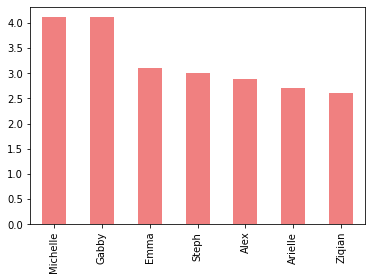

In [22]:
avg_2019_know_women_plot = avg_2019_know_women.sort_values(ascending=False).plot.bar(color="LightCoral")
avg_2019_know_women_plot

In [23]:
avg_2019_know_descending = []
avg_2019_know_men_values = []
avg_2019_know_women_values = []

for person in avg_2019_know.sort_values(ascending=False).index:
    avg_2019_know_descending += [person]
    if person in men:
        avg_2019_know_men_values += [avg_2019_know[person]]
        avg_2019_know_women_values += [0.0]
    elif person in women:
        avg_2019_know_women_values += [avg_2019_know[person]]
        avg_2019_know_men_values += [0.0]

In [24]:
avg_2019_know_men_values

[4.222222222222222,
 0.0,
 0.0,
 4.0,
 3.5,
 3.3,
 3.2222222222222223,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.111111111111111]

In [25]:
avg_2019_know_women_values

[0.0,
 4.111111111111111,
 4.111111111111111,
 0.0,
 0.0,
 0.0,
 0.0,
 3.111111111111111,
 0.0,
 3.0,
 2.888888888888889,
 2.7,
 2.6,
 0.0]

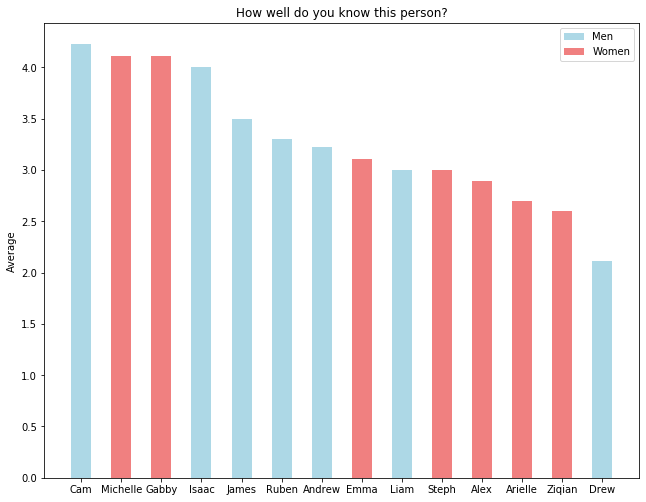

In [26]:
N = len(avg_2019_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_know_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like this person?

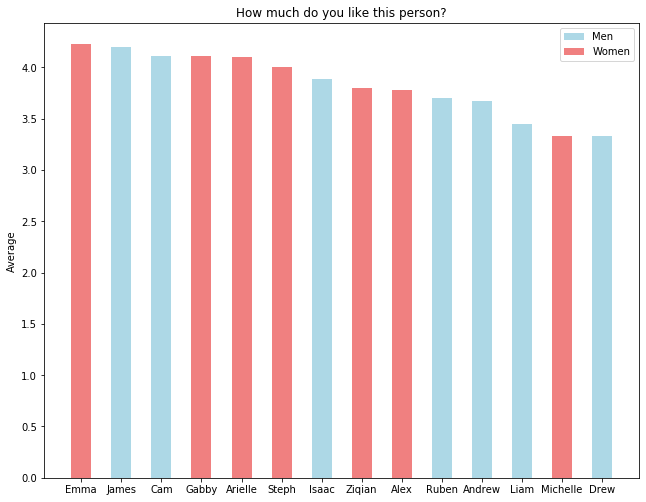

In [27]:
avg_2019_like_descending = []
avg_2019_like_men_values = []
avg_2019_like_women_values = []

for person in avg_2019_like.sort_values(ascending=False).index:
    avg_2019_like_descending += [person]
    if person in men:
        avg_2019_like_men_values += [avg_2019_like[person]]
        avg_2019_like_women_values += [0.0]
    elif person in women:
        avg_2019_like_women_values += [avg_2019_like[person]]
        avg_2019_like_men_values += [0.0]

N = len(avg_2019_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_like_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How much do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

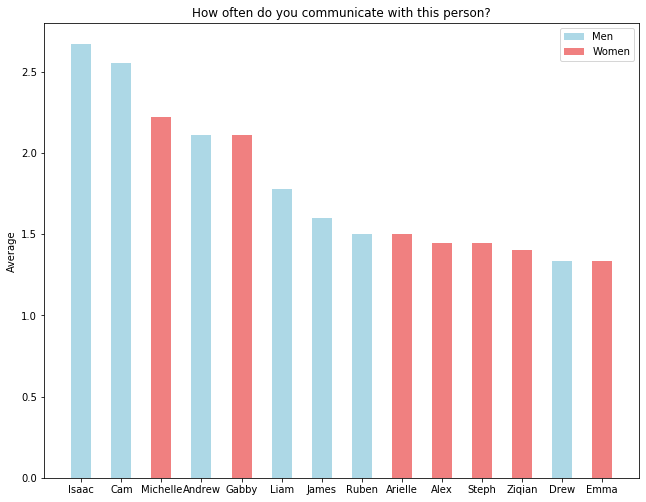

In [28]:
avg_2019_contact_descending = []
avg_2019_contact_men_values = []
avg_2019_contact_women_values = []

for person in avg_2019_contact.sort_values(ascending=False).index:
    avg_2019_contact_descending += [person]
    if person in men:
        avg_2019_contact_men_values += [avg_2019_contact[person]]
        avg_2019_contact_women_values += [0.0]
    elif person in women:
        avg_2019_contact_women_values += [avg_2019_contact[person]]
        avg_2019_contact_men_values += [0.0]

N = len(avg_2019_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_contact_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust this person?

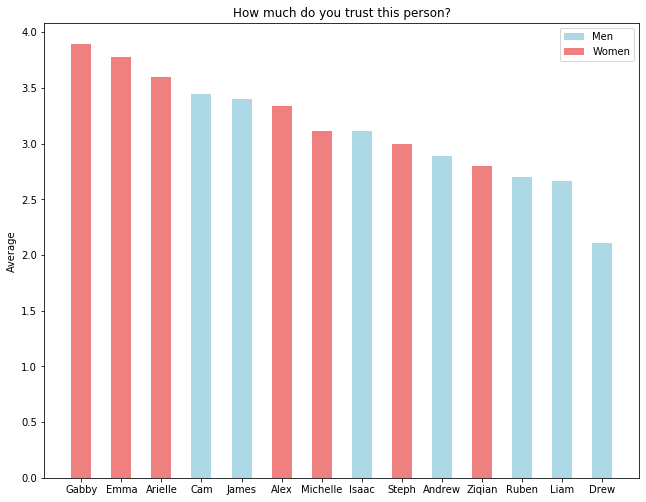

In [29]:
avg_2019_trust_descending = []
avg_2019_trust_men_values = []
avg_2019_trust_women_values = []

for person in avg_2019_trust.sort_values(ascending=False).index:
    avg_2019_trust_descending += [person]
    if person in men:
        avg_2019_trust_men_values += [avg_2019_trust[person]]
        avg_2019_trust_women_values += [0.0]
    elif person in women:
        avg_2019_trust_women_values += [avg_2019_trust[person]]
        avg_2019_trust_men_values += [0.0]

N = len(avg_2019_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_trust_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to this person for advice or emotional support?

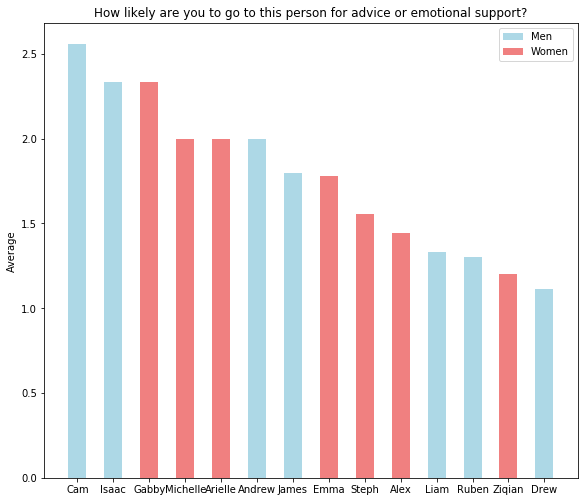

In [30]:
avg_2019_support_descending = []
avg_2019_support_men_values = []
avg_2019_support_women_values = []

for person in avg_2019_support.sort_values(ascending=False).index:
    avg_2019_support_descending += [person]
    if person in men:
        avg_2019_support_men_values += [avg_2019_support[person]]
        avg_2019_support_women_values += [0.0]
    elif person in women:
        avg_2019_support_women_values += [avg_2019_support[person]]
        avg_2019_support_men_values += [0.0]

N = len(avg_2019_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, avg_2019_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, avg_2019_support_women_values, width, color="LightCoral")
ax.set_ylabel('Average')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(avg_2019_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## Average: Correlation

In [31]:
avg_2019_all = pd.concat([avg_2019_know, avg_2019_contact, avg_2019_like, avg_2019_trust, avg_2019_support], axis=1, join='inner')
avg_2019_all.columns = ['know', 'contact', 'like', 'trust', 'support']
avg_2019_all

,know,contact,like,trust,support
Steph,3.000000,1.444444,4.000000,3.000000,1.555556
Emma,3.111111,1.333333,4.222222,3.777778,1.777778
Gabby,4.111111,2.111111,4.111111,3.888889,2.333333
Cam,4.222222,2.555556,4.111111,3.444444,2.555556
Andrew,3.222222,2.111111,3.666667,2.888889,2.000000
Isaac,4.000000,2.666667,3.888889,3.111111,2.333333
Alex,2.888889,1.444444,3.777778,3.333333,1.444444
Arielle,2.700000,1.500000,4.100000,3.600000,2.000000
Liam,3.000000,1.777778,3.444444,2.666667,1.333333
James,3.500000,1.600000,4.200000,3.400000,1.800000


In [32]:
corr = avg_2019_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.831219,0.262104,0.515694,0.816749
contact,0.831219,1.000000,0.001505,0.206022,0.809913
like,0.262104,0.001505,1.000000,0.794786,0.483533
trust,0.515694,0.206022,0.794786,1.000000,0.675388
support,0.816749,0.809913,0.483533,0.675388,1.000000


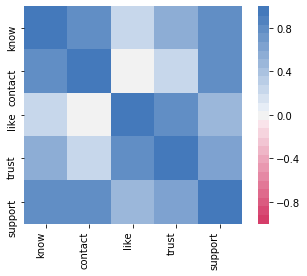

In [33]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know this person?

In [34]:
data_2019_know_corr = data_2019_know.corr()
data_2019_know_corr

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,1.000000,-0.070071,0.184900,0.206725,0.129099,0.144841,0.311400,0.682048,0.539792,0.490990,0.885259,0.866025,0.912245,-0.316359
Emma,-0.070071,1.000000,-0.040522,-0.107211,0.213697,0.517306,-0.120605,0.322876,-0.130107,-0.188982,-0.134840,-0.288675,0.018291,0.269680
Gabby,0.184900,-0.040522,1.000000,0.572078,0.475191,0.000000,0.000000,0.568535,0.160128,0.080582,0.000000,-0.246183,0.150756,-0.171033
Cam,0.206725,-0.107211,0.572078,1.000000,0.330289,0.400064,0.018182,0.427810,0.452602,0.060634,0.447214,-0.068599,0.203655,-0.129099
Andrew,0.129099,0.213697,0.475191,0.330289,1.000000,0.872103,-0.328798,0.087408,0.704563,0.722806,0.103695,-0.262950,-0.069945,0.733359
Isaac,0.144841,0.517306,0.000000,0.400064,0.872103,1.000000,0.000000,0.163908,0.603023,0.507093,0.404520,-0.153897,0.000000,0.712069
Alex,0.311400,-0.120605,0.000000,0.018182,-0.328798,0.000000,1.000000,0.375379,-0.127273,-0.254000,0.454545,0.207390,0.147148,-0.298142
Arielle,0.682048,0.322876,0.568535,0.427810,0.087408,0.163908,0.375379,1.000000,0.083333,0.046097,0.568750,0.371159,0.626848,-0.222365
Liam,0.539792,-0.130107,0.160128,0.452602,0.704563,0.603023,-0.127273,0.083333,1.000000,0.850420,0.467099,0.300000,0.438904,0.624100
James,0.490990,-0.188982,0.080582,0.060634,0.722806,0.507093,-0.254000,0.046097,0.850420,1.000000,0.390335,0.397026,0.387419,0.597614


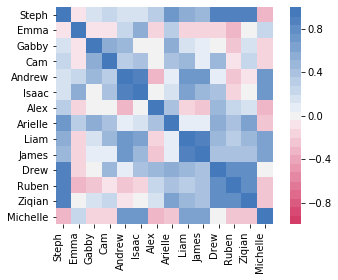

In [35]:
ax = sns.heatmap(
    data_2019_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like this person?

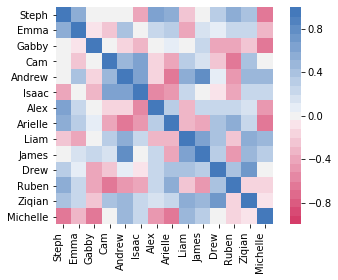

In [36]:
data_2019_like_corr = data_2019_like.corr()
data_2019_like_corr

ax = sns.heatmap(
    data_2019_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

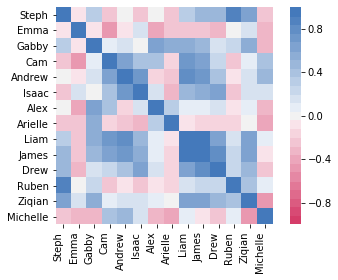

In [37]:
data_2019_contact_corr = data_2019_contact.corr()
data_2019_contact_corr

ax = sns.heatmap(
    data_2019_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust this person?

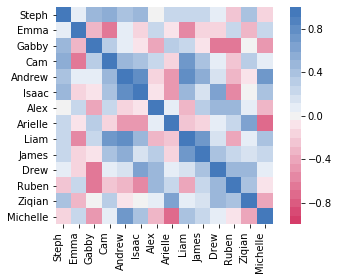

In [38]:
data_2019_trust_corr = data_2019_trust.corr()
data_2019_trust_corr

ax = sns.heatmap(
    data_2019_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to this person for advice or emotional support?

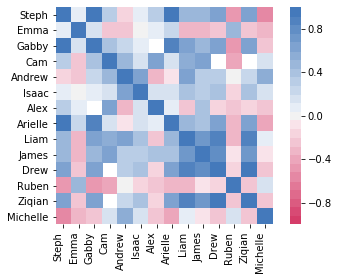

In [39]:
data_2019_support_corr = data_2019_support.corr()
data_2019_support_corr

ax = sns.heatmap(
    data_2019_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);